# Ridge and Lasso Regression

Ridge Regression and Lasso Regression are two types of linear regression that include regularization techniques to prevent overfitting and improve model generalization. Both methods add a penalty term to the loss function, but they do so in different ways.

### Ridge Regression

Ridge regression modifies the loss function of Ordinary Least Squares (OLS) regression by adding a penalty term that is proportional to the sum of the squared coefficients:

$ \text{Loss} = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2 $

Where:
- $ y_i $ is the actual target value.
- $ \hat{y}_i $ is the predicted value.
- $ w_j $ are the model coefficients.
- $ \lambda $ is the regularization parameter.

**Effect**: Ridge regression reduces the complexity of the model by shrinking the coefficients, reducing changes of overfitting. This is similar to L2 regularization, which is commonly used in neural networks to prevent overfitting. As the size of weights is penalized, the larger weights are shrunk more than the smaller ones, resulting prediction line to bend clockwise towards the origin. This makes it less sensitive to the input data. The larger the value of $ \lambda $, the more the coefficients are shrunk.

### Lasso Regression

Lasso regression also modifies the OLS loss function, but it uses the absolute value of the coefficients:

$ \text{Loss} = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j| $
  
Lasso regression can shrink some coefficients to exactly zero, effectively performing variable selection. This makes it particularly useful when you suspect that many features are irrelevant to the prediction.

This is also called L1 regularization, and it has the effect of setting some coefficients to zero, effectively performing feature selection. The prediction line is bent towards the origin, making it more robust to outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [2]:
x = np.linspace(.1, 10, 50).reshape(-1, 1)
y = np.log(x).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [3]:
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(x_train, y_train)

ridge_sk = Ridge(alpha=50, max_iter=1000)
ridge_sk.fit(x_train, y_train)

lasso_sk = Lasso(alpha=.6)
lasso_sk.fit(x_train, y_train)


print(
    f'LinReg: {lin_reg_sk.score(x_test, y_test):.4f} | '
    f'Ridge: {ridge_sk.score(x_test, y_test):.4f} | '
    f'Lasso: {lasso_sk.score(x_test, y_test):.4f}'
)

LinReg: 0.7424 | Ridge: 0.8070 | Lasso: 0.8182


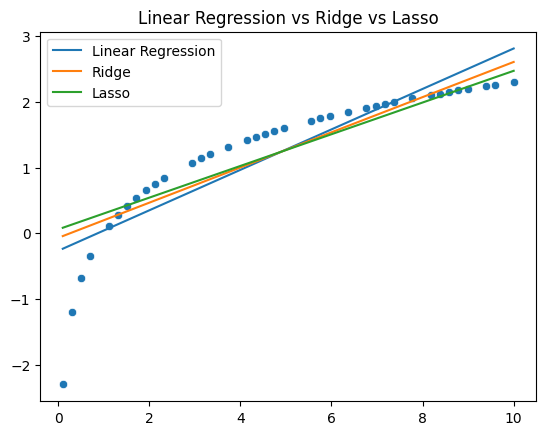

In [4]:
sns.scatterplot(x=x_train[:, 0], y=y_train)
sns.lineplot(x=x_train[:, 0], y=lin_reg_sk.predict(x_train), label='Linear Regression')
sns.lineplot(x=x_train[:, 0], y=ridge_sk.predict(x_train), label='Ridge')
sns.lineplot(x=x_train[:, 0], y=lasso_sk.predict(x_train), label='Lasso')
plt.title('Linear Regression vs Ridge vs Lasso')
plt.show()

### Affect of $ \lambda $ on Ridge and Lasso

The regularization parameter $ \lambda $ controls the strength of the penalty term. When $ \lambda = 0 $, the penalty term has no effect, and the loss function is the same as OLS. As $ \lambda $ increases, the coefficients are shrunk more, and the model complexity is reduced.

**Visualizing:**

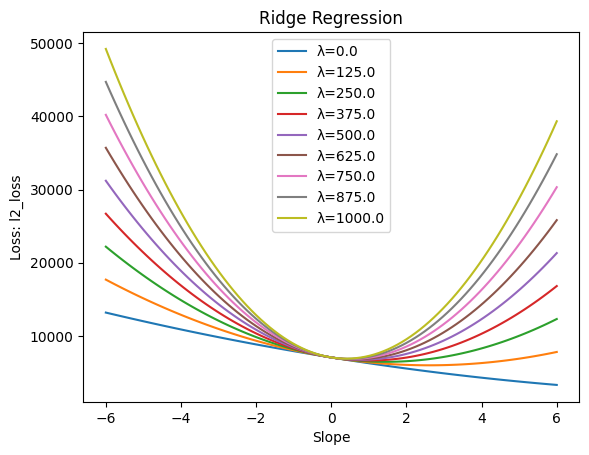

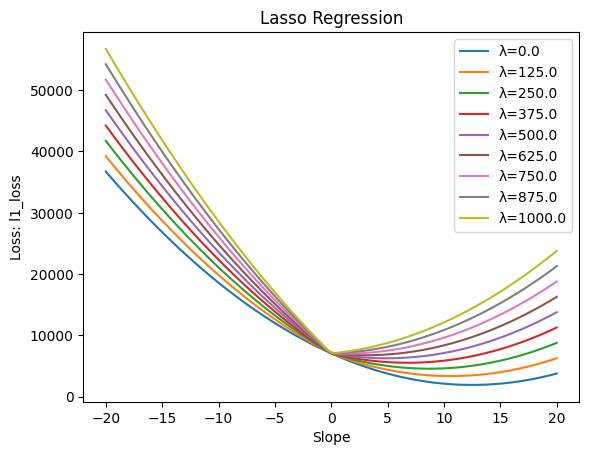

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x = np.linspace(0.1, 10, 50).reshape(-1, 1)
y = np.log(x).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

def plot_slope_vs_loss(x, y, slopes, title, loss_fn: callable):
    lmda_values = np.linspace(0, 1000, 9)
    intercept = np.mean(y) - np.mean(x) * np.mean(y / x) * 20
    for lm in lmda_values:
        losses = [loss_fn(x, y, slope, lm, intercept) for slope in slopes]
        plt.plot(slopes, losses, label=f'λ={lm}')
    plt.xlabel('Slope')
    plt.ylabel(f'Loss: {loss_fn.__name__}')
    plt.title(title)
    plt.legend()
    plt.show()

def l2_loss(x, y, slope, lmda, intercept):
    return np.mean((y - (slope * x + intercept)) ** 2) + lmda * (slope ** 2)

def l1_loss(x, y, slope, lmda, intercept):
    return np.mean((y - (slope * x + intercept)) ** 2) + lmda * np.abs(slope)

plot_slope_vs_loss(x_train, y_train, np.linspace(-6, 6, 100), 'Ridge Regression', l2_loss)
plot_slope_vs_loss(x_train, y_train, np.linspace(-20, 20, 100), 'Lasso Regression', l1_loss)

## Ridge Regression

#### Closed Form Solution

Ridge and Lasso regression can be solved using the closed-form solution, which is a mathematical formula that gives the exact solution. The closed-form solution for Ridge regression is:

$ w = (X^T X + \lambda I)^{-1} X^T y $

And for Lasso regression, there is no closed-form solution, but it can be solved using optimization techniques like gradient descent.

##### Derivation of Ridge Regression

The loss function for Ridge regression is:

$ \text{Loss} = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2 $

Where $ \hat{y}_i = w^T x_i $ is the predicted value.

The goal is to minimize the loss function by finding the optimal values of $ w $.

Taking the derivative of the loss function with respect to $ w $ and setting it to zero gives (we transpose the matrix to make dimensions compatible to get one value for each coefficient):

$ \frac{\partial \text{Loss}}{\partial w} = -2X^T(y - Xw) + 2\lambda w = 0 $

$ X^T(y - Xw) + \lambda w = 0 $

$ X^Ty - X^TXw + \lambda w = 0 $

$ X^TXw + \lambda w = X^Ty $

$ (X^TX + \lambda I)w = X^Ty $

$ w = (X^TX + \lambda I)^{-1} X^Ty $

This closed form solution has a complexity of $ O(p^3) $, where $ p $ is the number of features. Thus is it only feasible for small datasets. For anything larger, we use optimization techniques like gradient descent or Single Value Decomposition (SVD) which gives an approximate solution.

### Open Form Solution

$ \text{Loss} = \sum_{i=1}^{N} \left( y_i - w^T x_i \right)^2 + \alpha \|w\|_2^2 $

$ \text{Loss} = \| y - X w \|_2^2 + \alpha \|w\|_2^2 $

$ \text{Loss} = \| y - X w \|_2^2 + \alpha \|w\|_2^2 $

### 1. Expanding the Loss Function

The matrix form of the loss expands as:

$ \text{Loss} = (y - X w)^T (y - X w) + \alpha w^T w $

Expanding the terms we get 

$ = (y - X w)^T (y - X w) = y^T y - y^T X w - (X w)^T y + (X w)^T (X w) $

Note that $y$ is $(m,1)$, $X$ is $(m,n)$, $w$ is $(n,1)$ $Xw$ is $(m,1)$.

Thus $y^T X w$ and $(X w)^T y$ are both scalars and same value. So we can rewrite this as:

$ = y^T y - 2 y^T X w + w^T X^T X w + \alpha w^T w $

### 2. Differentiating with Respect to $  w  $
To find the gradient, take the derivative with respect to $  w  $:

$ \frac{\partial \text{Loss}}{\partial w} = -2 X^T y + 2 X^T X w + 2 \alpha w $

This simplifies to:

$ = 2 X^T X w - 2 X^T y + 2 \alpha w $

Reorganizing terms:

$ = 2 X^T (X w - y) + 2 \alpha w $

Thus, the gradient of the Ridge regression loss function is:

$ \text{grad} = -2 X^T (y - X w) + 2 \alpha w $

$$ \dots $$

#### Implementation

In [6]:
class Ridge:
    def __init__(self, alpha=1.0, solver='auto', max_iter=1000, lr=0.01, tol=1e-4):
        if solver not in ['auto', 'open', 'closed']:
            raise ValueError(f'Invalid solver: {solver}. Must be one of "auto", "open", "closed"')
        self.alpha = alpha
        self.solver = solver
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        if self.solver == 'auto':
            # Closed form solution is faster for small datasets
            if X.shape[0] * X.shape[1] < 1e6: # 1e6 is a rough estimate
                self._fit_closed_form(X_bias, y)
            else:
                self._fit_gradient_descent(X_bias, y)
        elif self.solver == 'closed':
            self._fit_closed_form(X_bias, y)
        else:
            self._fit_gradient_descent(X_bias, y)

    def _fit_closed_form(self, X, y):
        m, n = X.shape
        # make n x n identity matrix
        identity = np.eye(n)
        # don't use regularization for intercept
        identity[0, 0] = 0

        # calculate derivative of loss function
        XtX = X.T @ X
        Xty = X.T @ y
        dL = np.linalg.inv(XtX + self.alpha * identity) @ Xty

        # set intercept and coefficients
        self.intercept_ = dL[0]
        self.coef_ = dL[1:]

    def _fit_gradient_descent(self, X, y):
        m, n = X.shape
        # initialize weights
        weights = np.zeros(n)

        for i in range(self.max_iter):
            # calculate gradient
            y_pred = X @ weights
            grad = -2 * X.T @ (y - y_pred) + 2 * self.alpha * weights

            # update weights
            weights -= self.lr * grad

            # check for convergence
            if np.linalg.norm(grad) < self.tol:
                break

        self.intercept_ = weights[0]
        self.coef_ = weights[1:]

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

## Lasso Regression

Lasso regression, which uses L1 regularization (penalizing the absolute values of the weights), does not have a closed-form solution due to the nature of the L1 penalty. 

Lasso regression's cost function includes an L1 regularization term, which penalizes the sum of the absolute values of the coefficients:

$ \text{Loss} = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} X_{ij} w_j \right)^2 + \alpha \sum_{j=1}^{p} |w_j| $

$ = \frac{1}{2n} \sum_{i=1}^{N} \left( y_i - X_i W \right)^2 + \alpha \sum_{j=1}^{p} |w_j| $

$ = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j| $

where $ \hat{y}_i = w^T x_i $ is the predicted value. The goal is to minimize the loss function by finding the optimal values of $ w $.

The L1 norm $\sum |w_j|$ is not  non-differentiable "kinks" in the loss function whenever a weight $w_j = 0$, which makes direct, closed-form differentiation and matrix algebra solutions infeasible.



<!-- $ \frac{\partial \text{Loss}}{\partial w} = -2X^T(y - Xw) + \lambda \cdot \text{sign}(w)  $ -->

#### Coordinated Gradient Descent

We use a technique called Coordinated Gradient Descent to solve Lasso regression. In this method, we update one coefficient at a time while keeping the others fixed. 

- Lasso's L1 penalty term is non differentiable at $w = 0$, so we cannot use gradient descent directly. Coordinated Gradient Descent simplifies the problem by using soft-thresholding to update the weights.
- The soft-thresholding operator is defined as $ S(z, \lambda) = \text{sign}(z) \cdot \max(0, |z| - \lambda) $.
- This allows for a 

#### Gradient of the MSE Term with Respect to $ \beta_k $

We have MSE part of the loss function as:

$ \frac{1}{2n} \sum_{i=1}^{N} \left( y_i - X_i W \right)^2 $

$ \frac{\partial}{\partial W} \left( \frac{1}{2n} \sum_{i=1}^{N} \left( y_i - X_i W \right)^2 \right) $

$ = \frac{\partial}{\partial W} \left( \frac{1}{2n} || y_i - X W ||_2^2 \right) $

$ = - \frac{1}{n} X^T (y - X W) $


#### Gradient of the L1 Penalty with Respect to $ w_i $

The L1 penalty term $ \alpha |\beta_k| $ is non-differentiable at zero. However, its subgradient is:

$ \frac{\partial}{\partial \beta_k} \alpha |\beta_k| =
\begin{cases}
\alpha & \text{if } \beta_k > 0 \\
-\alpha & \text{if } \beta_k < 0 \\
[-\alpha, \alpha] & \text{if } \beta_k = 0
\end{cases} $

This subgradient represents the effect of L1 regularization, which "shrinks" $ \beta_k $ towards zero, making it zero when the absolute value of the gradient is less than $ \alpha $.

### 4. Combining Gradients: Soft Thresholding

To update $ \beta_k $, we combine the two parts (MSE and L1 penalty). The update rule for $ \beta_k $ is derived by setting the gradient to zero and solving for $ \beta_k $:

$ \beta_k = \frac{1}{n} \sum_{i=1}^{n} X_{ik} \left( y_i - \sum_{j \neq k} X_{ij} \beta_j \right) $

This leads to the *soft thresholding* operation:

$ \beta_k = \text{soft\_threshold}\left( \frac{1}{n} X_{:,k}^T (y - X \beta), \alpha \right) $

where the soft threshold function is defined as:

$ \text{soft\_threshold}(x, \lambda) = \text{sign}(x) \cdot \max(|x| - \lambda, 0) $

### 5. Coordinate Descent Update Rule

The coordinate descent algorithm then iteratively updates each $ \beta_k $ using the soft-thresholded value. At each iteration:
1. Compute the gradient for each feature $ k $.
2. Apply the soft-thresholding operation to update $ \beta_k $.
3. Stop when the change in coefficients across all features is below a specified tolerance.

### 6. Final Formulae for Lasso Updates

Putting it all together, the iterative update rule in the `fit` function is:

$ \beta_k^{(t+1)} = \text{soft\_threshold}\left( \frac{1}{n} X_{:,k}^T (y - X \beta^{(t)}), \alpha \right) $

This is repeated for each coefficient until convergence, which minimizes the Lasso loss function while promoting sparsity through the L1 penalty.

In [7]:
import numpy as np

class Lasso:
    def __init__(self, alpha=1.0, max_iter=1000, tol=1e-4):
        assert alpha > 0, "alpha must be positive"

        # regularization parameter, higher value = more coefficients close to 0
        self.alpha = alpha
        # maximum number of iterations for optimization algorithm
        self.max_iter = max_iter
        # tolerance for optimization algorithm, stop if weights change less than tol
        self.tol = tol
        # coefficients for each feature
        self.coef_ = None
        # intercept
        self.intercept_ = 0.0

    def _soft_threshold(self, x, lambda_):
        return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0)

    def fit(self, X, y):
        # Ensure X and y are numpy arrays
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)

        assert X.ndim == 2, "X must be 2D array"
        assert y.ndim == 1, "y must be 1D array"
        assert len(X) == len(y), "X and y must have same number of samples"

        n_samples, n_features = X.shape

        # Set mean of X and y to 0
        X_mean = np.mean(X, axis=0)
        y_mean = np.mean(y)
        X = X - X_mean
        y = y - y_mean

        # Initialize coefficients
        self.coef_ = np.zeros(n_features)

        # Precompute X norm
        X_norm = np.sum(X ** 2, axis=0)
        # Avoid division by zero
        X_norm = np.where(X_norm == 0, 1, X_norm)

        # Coordinate descent with vectorized gradient
        for _ in range(self.max_iter):
            coef_old = self.coef_.copy()

            # Compute residuals for all features at once
            # Equivalent to residuals = y - X @ w
            residuals = y - X @ self.coef_

            # Compute gradients for all features
            # Equivalent to X.T @ residuals
            gradients = X.T @ residuals + X.T @ (X @ self.coef_)

            # Update all coefficients using soft thresholding
            self.coef_ = self._soft_threshold(gradients / X_norm, self.alpha * n_samples / X_norm)

            # Check convergence using relative change
            if np.sum(np.abs(self.coef_ - coef_old)) / (1 + np.sum(np.abs(coef_old))) < self.tol:
                break

        self.intercept_ = y_mean - np.dot(X_mean, self.coef_)
        return self

    def predict(self, X):
        return np.dot(np.asarray(X), self.coef_) + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        u = np.sum((y - y_pred) ** 2)
        v = np.sum((y - np.mean(y)) ** 2)
        return 1 - u/v if v != 0 else 0.0

In [8]:
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(x_train, y_train)

ridge = Ridge(alpha=50, max_iter=1000)
ridge.fit(x_train, y_train)

lasso = Lasso(alpha=.6)
lasso.fit(x_train, y_train)


print(
    f'{"Ours ":>8}'
    f'Ridge: {ridge.score(x_test, y_test):.4f} | '
    f'Lasso: {lasso.score(x_test, y_test):.4f}'
)

print(
    f'{"SKLearn ":>8}'
    f'Ridge: {ridge_sk.score(x_test, y_test):.4f} | '
    f'Lasso: {lasso_sk.score(x_test, y_test):.4f}'
);

   Ours Ridge: 0.8070 | Lasso: 0.8182
SKLearn Ridge: 0.8070 | Lasso: 0.8182


## Conclusion

In this notebook, we explored Ridge and Lasso regression, two powerful techniques for linear regression that incorporate regularization to prevent overfitting and improve model generalization.

### Key Takeaways:

1. **Ridge Regression**:
    - Ridge regression adds an L2 penalty (sum of squared coefficients) to the loss function.
    - It shrinks the coefficients but does not set any of them to zero, which means it retains all features.
    - It is particularly useful when dealing with multicollinearity.

2. **Lasso Regression**:
    - Lasso regression adds an L1 penalty (sum of absolute values of coefficients) to the loss function.
    - It can shrink some coefficients to exactly zero, effectively performing feature selection.
    - This makes it useful when you suspect that many features are irrelevant to the prediction.

3. **Implementation**:
    - We implemented both Ridge and Lasso regression from scratch and compared them with the implementations from `scikit-learn`.
    - Our custom implementations provided similar results to the `scikit-learn` models, demonstrating the correctness of our approach.

4. **Visualization**:
    - We visualized the effect of the regularization parameter \( \lambda \) on the loss function for both Ridge and Lasso regression.
    - We also plotted the predictions of Linear Regression, Ridge, and Lasso models to see how they fit the training data.

5. **Performance**:
    - We evaluated the performance of our models using the R² score on the test set.
    - Both Ridge and Lasso regression showed improved generalization compared to the standard Linear Regression model.